In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [6]:
def calculate_coherence(signal1, signal2, fs):
    # 'scipy.signal' module to compute the power spectral density using Welch's method and
    # the cross-power spectral density
    f, Pxx_den_signal = signal.welch(signal1, fs=fs, nperseg=256)
    f, Pyy_den_signal = signal.welch(signal2, fs=fs, nperseg=256)
    f, Pxy = signal.csd(signal1, signal2, fs=fs, nperseg=256)
    
    # Refer to this paper for the equation coherence = |Pxy|^2 / (Pxx * Pyy) "Application of Time-varying Coherence 
    # to Coordinative Connectivity Based on Event Related EEG"
    coherence = np.abs(Pxy)**2 / (Pxx_den_signal * Pyy_den_signal)
    
    return f, coherence

In [7]:
# Generate example EEG signals
# Replace with real EEG signals
fs = 1000  # Sampling frequency in Hz
t = np.arange(0, 5, 1/fs)  # Time vector
signal1 = np.sin(2 * np.pi * 10 * t) + 0.5 * np.random.randn(len(t))
signal2 = np.sin(2 * np.pi * 10 * t + np.pi/4) + 0.5 * np.random.randn(len(t))

In [8]:
# Calculate coherence
frequencies, coherence = calculate_coherence(signal1, signal2, fs)

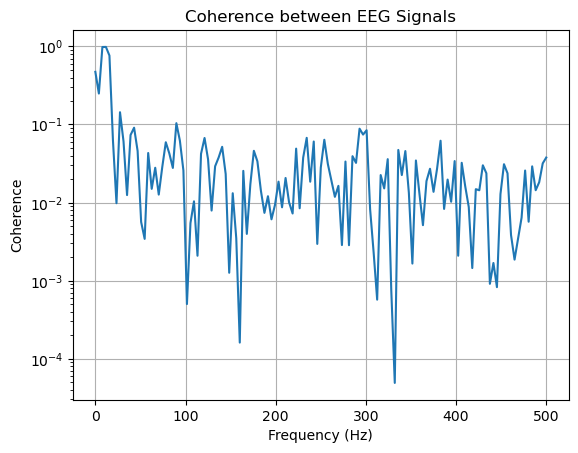

In [9]:
# Plot the coherence
plt.figure()
plt.semilogy(frequencies, coherence)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.title('Coherence between EEG Signals')
plt.grid()
plt.show()